In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics

In [2]:
df = pd.read_csv('IMDB_Movies.csv')

df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [4]:
df.isnull()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,True,True,False,True,False,False,True,False,...,False,True,True,True,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,True,False,False,False,True,False
5039,False,True,False,False,True,False,False,False,True,False,...,False,False,False,False,True,True,False,False,False,False
5040,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,True,False
5041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [5]:
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

In [8]:
df.drop_duplicates(keep ='first', inplace = True)

C:\Users\Gautam\AppData\Local\Temp\ipykernel_7024\3346049845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(keep ='first', inplace = True)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3723 non-null   object 
 1   director_name              3723 non-null   object 
 2   num_critic_for_reviews     3723 non-null   float64
 3   duration                   3723 non-null   float64
 4   director_facebook_likes    3723 non-null   float64
 5   actor_3_facebook_likes     3723 non-null   float64
 6   actor_2_name               3723 non-null   object 
 7   actor_1_facebook_likes     3723 non-null   float64
 8   gross                      3723 non-null   float64
 9   genres                     3723 non-null   object 
 10  actor_1_name               3723 non-null   object 
 11  movie_title                3723 non-null   object 
 12  num_voted_users            3723 non-null   int64  
 13  cast_total_facebook_likes  3723 non-null   int64

# Movies with highest profit

In [10]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


In [11]:
profit=[]
for i in df.values:
    profit.append(i[8]-i[22])
df = df.assign(Profit = profit)   
df.sort_values(by = 'Profit', ascending = False)


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,2.370000e+08,2009.0,936.0,7.9,1.78,33000,5.235058e+08
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,...,English,USA,PG-13,1.500000e+08,2015.0,2000.0,7.0,2.00,150000,5.021773e+08
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,...,English,USA,PG-13,2.000000e+08,1997.0,14000.0,7.7,2.35,26000,4.586723e+08
3024,Color,George Lucas,282.0,125.0,0.0,504.0,Peter Cushing,11000.0,460935665.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG,1.100000e+07,1977.0,1000.0,8.7,2.35,33000,4.499357e+08
3080,Color,Steven Spielberg,215.0,120.0,14000.0,548.0,Dee Wallace,861.0,434949459.0,Family|Sci-Fi,...,English,USA,PG,1.050000e+07,1982.0,725.0,7.9,1.85,34000,4.244495e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,...,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973,-2.127110e+09
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,...,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000,-2.397702e+09
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,...,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607,-2.499804e+09
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,...,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000,-4.199788e+09


# IMDB Top 250 Movies

In [12]:
top25000 = df[df['num_voted_users']>25000]
top250 = top25000.sort_values(by = 'imdb_score', ascending = False )
top250['Rank']=top250['imdb_score'].rank(method='first',ascending=False)
top250.head(250)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Rank
1937,Color,Frank Darabont,199.0,142.0,0.0,461.0,Jeffrey DeMunn,11000.0,28341469.0,Crime|Drama,...,USA,R,25000000.0,1994.0,745.0,9.3,1.85,108000,3341469.0,1.0
3466,Color,Francis Ford Coppola,208.0,175.0,0.0,3000.0,Marlon Brando,14000.0,134821952.0,Crime|Drama,...,USA,R,6000000.0,1972.0,10000.0,9.2,1.85,43000,128821952.0,2.0
66,Color,Christopher Nolan,645.0,152.0,22000.0,11000.0,Heath Ledger,23000.0,533316061.0,Action|Crime|Drama|Thriller,...,USA,PG-13,185000000.0,2008.0,13000.0,9.0,2.35,37000,348316061.0,3.0
2837,Color,Francis Ford Coppola,149.0,220.0,0.0,3000.0,Al Pacino,22000.0,57300000.0,Crime|Drama,...,USA,R,13000000.0,1974.0,14000.0,9.0,1.85,14000,44300000.0,4.0
3355,Color,Quentin Tarantino,215.0,178.0,16000.0,857.0,Eric Stoltz,13000.0,107930000.0,Crime|Drama,...,USA,R,8000000.0,1994.0,902.0,8.9,2.35,45000,99930000.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,Color,Pierre Morel,309.0,93.0,180.0,485.0,Holly Valance,14000.0,145000989.0,Action|Thriller,...,France,PG-13,25000000.0,2008.0,816.0,7.9,2.35,29000,120000989.0,246.0
3595,Color,Darren Aronofsky,391.0,109.0,0.0,120.0,John D'Leo,1000.0,26236603.0,Drama|Sport,...,USA,R,6000000.0,2008.0,245.0,7.9,2.35,10000,20236603.0,247.0
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,248.0
89,Color,Don Hall,384.0,102.0,38.0,562.0,Daniel Henney,756.0,222487711.0,Action|Adventure|Animation|Comedy|Drama|Family...,...,USA,PG,165000000.0,2014.0,719.0,7.9,2.39,41000,57487711.0,249.0


Extract all the movies in the IMDb_Top_250 column which are not in the English language.

In [13]:
non_english_movies = top250[top250['language']!= 'English']
non_english_movies.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Rank
4498,Color,Sergio Leone,181.0,142.0,0.0,24.0,Luigi Pistilli,16000.0,6100000.0,Western,...,Italy,Approved,1.200000e+06,1966.0,34.0,8.9,2.35,20000,4.900000e+06,6.0
4029,Color,Fernando Meirelles,214.0,135.0,353.0,40.0,Seu Jorge,1000.0,7563397.0,Crime|Drama,...,Brazil,R,3.300000e+06,2002.0,69.0,8.7,1.85,28000,4.263397e+06,15.0
4747,Black and White,Akira Kurosawa,153.0,202.0,0.0,4.0,Minoru Chiaki,304.0,269061.0,Action|Adventure|Drama,...,Japan,Unrated,2.000000e+06,1954.0,8.0,8.7,1.37,11000,-1.730939e+06,20.0
2373,Color,Hayao Miyazaki,246.0,125.0,6000.0,7.0,Ryûnosuke Kamiki,17.0,10049886.0,Adventure|Animation|Family|Fantasy,...,Japan,PG,1.900000e+07,2001.0,10.0,8.6,1.85,28000,-8.950114e+06,24.0
4921,Color,Majid Majidi,46.0,89.0,373.0,27.0,Amir Farrokh Hashemian,36.0,925402.0,Drama|Family,...,Iran,PG,1.800000e+05,1997.0,35.0,8.5,1.85,0,7.454020e+05,36.0
4259,Color,Florian Henckel von Donnersmarck,215.0,137.0,207.0,155.0,Ulrich Mühe,380.0,11284657.0,Drama|Thriller,...,Germany,R,2.000000e+06,2006.0,284.0,8.5,2.35,39000,9.284657e+06,44.0
2970,Color,Wolfgang Petersen,96.0,293.0,249.0,18.0,Martin Semmelrogge,362.0,11433134.0,Adventure|Drama|Thriller|War,...,West Germany,R,1.400000e+07,1981.0,21.0,8.4,1.85,11000,-2.566866e+06,50.0
1298,Black and White,Jean-Pierre Jeunet,242.0,122.0,0.0,54.0,Jamel Debbouze,326.0,33201661.0,Comedy|Romance,...,France,R,7.700000e+07,2001.0,326.0,8.4,2.35,39000,-4.379834e+07,53.0
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,...,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000,-2.397702e+09,54.0
4659,Color,Asghar Farhadi,354.0,123.0,0.0,620.0,Leila Hatami,786.0,7098492.0,Drama|Mystery,...,Iran,PG-13,5.000000e+05,2011.0,712.0,8.4,1.85,48000,6.598492e+06,57.0


# Best Directors

In [26]:
 best_directors = df.groupby('director_name').mean()['imdb_score']
 best_directors.sort_values(ascending = False).head(10)   

C:\Users\Gautam\AppData\Local\Temp\ipykernel_7024\2207332270.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  best_directors = df.groupby('director_name').mean()['imdb_score']


director_name
Akira Kurosawa       8.700000
Charles Chaplin      8.600000
Tony Kaye            8.600000
Damien Chazelle      8.500000
Majid Majidi         8.500000
Alfred Hitchcock     8.500000
Ron Fricke           8.500000
Sergio Leone         8.433333
Christopher Nolan    8.425000
Richard Marquand     8.400000
Name: imdb_score, dtype: float64

# Popular Genre

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 0 to 5042
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3723 non-null   object 
 1   director_name              3723 non-null   object 
 2   num_critic_for_reviews     3723 non-null   float64
 3   duration                   3723 non-null   float64
 4   director_facebook_likes    3723 non-null   float64
 5   actor_3_facebook_likes     3723 non-null   float64
 6   actor_2_name               3723 non-null   object 
 7   actor_1_facebook_likes     3723 non-null   float64
 8   gross                      3723 non-null   float64
 9   genres                     3723 non-null   object 
 10  actor_1_name               3723 non-null   object 
 11  movie_title                3723 non-null   object 
 12  num_voted_users            3723 non-null   int64  
 13  cast_total_facebook_likes  3723 non-null   int64

In [16]:
g1=[]
for i in df.values:
    genre1=(i[9].split('|'))[0]
    g1.append(genre1)
df=df.assign(Genre1=g1)
g2=[]
for i in df.values:
    lis=i[9].split('|')
    if len(lis)>1:
        genre2=lis[1]
    else:
        genre2=lis[0]
    g2.append(genre2)
df=df.assign(Genre2=g2)
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Genre1,Genre2
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,Action,Adventure
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,Action,Adventure
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,Action,Adventure
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,Action,Thriller
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,Action,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,R,4500.0,2004.0,133.0,6.9,2.35,171,131507.0,Drama,Music
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,Not Rated,10000.0,2000.0,0.0,7.5,1.85,697,663780.0,Drama,Drama
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,PG-13,7000.0,2004.0,45.0,7.0,1.85,19000,417760.0,Drama,Sci-Fi
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,R,7000.0,1992.0,20.0,6.9,1.37,0,2033920.0,Action,Crime


In [29]:
df.groupby(['Genre1','Genre2']).mean()['gross'].sort_values(ascending=False).head(10)

C:\Users\Gautam\AppData\Local\Temp\ipykernel_7024\644180087.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Genre1','Genre2']).mean()['gross'].sort_values(ascending=False).head(10)


Genre1     Genre2   
Family     Sci-Fi       4.349495e+08
Adventure  Sci-Fi       2.286278e+08
           Family       1.224909e+08
           Animation    1.189597e+08
Action     Adventure    1.107067e+08
Fantasy    Mystery      1.006149e+08
Animation  Comedy       9.778178e+07
Action     Animation    9.268051e+07
Musical    Romance      9.208400e+07
Adventure  Drama        9.118703e+07
Name: gross, dtype: float64

# Number of user votes per decade.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3723 entries, 0 to 5042
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3723 non-null   object 
 1   director_name              3723 non-null   object 
 2   num_critic_for_reviews     3723 non-null   float64
 3   duration                   3723 non-null   float64
 4   director_facebook_likes    3723 non-null   float64
 5   actor_3_facebook_likes     3723 non-null   float64
 6   actor_2_name               3723 non-null   object 
 7   actor_1_facebook_likes     3723 non-null   float64
 8   gross                      3723 non-null   float64
 9   genres                     3723 non-null   object 
 10  actor_1_name               3723 non-null   object 
 11  movie_title                3723 non-null   object 
 12  num_voted_users            3723 non-null   int64  
 13  cast_total_facebook_likes  3723 non-null   int64

In [19]:
decade=[]
for i in df.values:
    if(i[23]>=1920 and i[23]<1930):
        decade.append('1920s')
    elif(i[23]>=1930 and i[23]<1940):
        decade.append('1930s')
    elif(i[23]>=1940 and i[23]<1950):
        decade.append('1940s')
    elif(i[23]>=1950 and i[23]<1960):
        decade.append('1950s')
    elif(i[23]>=1960 and i[23]<1970):
        decade.append('1960s')
    elif(i[23]>=1970 and i[23]<1980):
        decade.append('1970s')
    elif(i[23]>=1980 and i[23]<1990):
        decade.append('1980s')
    elif(i[23]>=1990 and i[23]<2000):
        decade.append('1990s')
    elif(i[23]>=2000 and i[23]<2010):
        decade.append('2000s')
    elif(i[23]>=2010 and i[23]<2020):
        decade.append('2010s')
    elif(i[23]>=2020 ):
        decade.append('2020s')
df=df.assign(Decade=decade)
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Genre1,Genre2,Decade
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0,Action,Adventure,2000s
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0,Action,Adventure,2000s
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,245000000.0,2015.0,393.0,6.8,2.35,85000,-44925825.0,Action,Adventure,2010s
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0,Action,Thriller,2010s
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0,Action,Adventure,2010s
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5026,Color,Olivier Assayas,81.0,110.0,107.0,45.0,Béatrice Dalle,576.0,136007.0,Drama|Music|Romance,...,4500.0,2004.0,133.0,6.9,2.35,171,131507.0,Drama,Music,2000s
5027,Color,Jafar Panahi,64.0,90.0,397.0,0.0,Nargess Mamizadeh,5.0,673780.0,Drama,...,10000.0,2000.0,0.0,7.5,1.85,697,663780.0,Drama,Drama,2000s
5033,Color,Shane Carruth,143.0,77.0,291.0,8.0,David Sullivan,291.0,424760.0,Drama|Sci-Fi|Thriller,...,7000.0,2004.0,45.0,7.0,1.85,19000,417760.0,Drama,Sci-Fi,2000s
5035,Color,Robert Rodriguez,56.0,81.0,0.0,6.0,Peter Marquardt,121.0,2040920.0,Action|Crime|Drama|Romance|Thriller,...,7000.0,1992.0,20.0,6.9,1.37,0,2033920.0,Action,Crime,1990s


In [20]:
usersvoted=df.groupby('Decade').sum()['num_voted_users']
usersvoted

C:\Users\Gautam\AppData\Local\Temp\ipykernel_7024\3147862954.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  usersvoted=df.groupby('Decade').sum()['num_voted_users']


Decade
1920s       116387
1930s       804839
1940s       159517
1950s       678336
1960s      2982551
1970s      8523299
1980s     19987476
1990s     69581866
2000s    170711435
2010s    119432961
Name: num_voted_users, dtype: int64

<Axes: xlabel='Decade'>

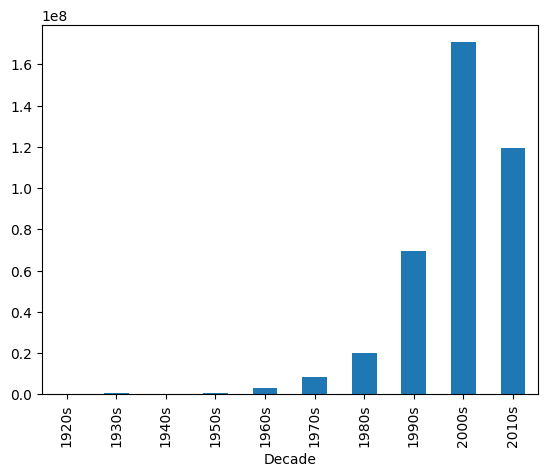

In [21]:
usersvoted.plot(kind='bar')

# Most Popular Actors

In [22]:
combination1=df[df['actor_1_name']=='Meryl Streep']
combination2=df[df['actor_1_name']=='Leonardo DiCaprio']
combination3=df[df['actor_1_name']=='Brad Pitt']

combined=pd.concat([combination1,combination2,combination2], axis=0)
combined

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit,Genre1,Genre2,Decade
410,Color,Nancy Meyers,187.0,120.0,278.0,963.0,Hunter Parrish,11000.0,112703470.0,Comedy|Drama|Romance,...,85000000.0,2009.0,2000.0,6.6,1.85,0,27703470.0,Comedy,Drama,2000s
1106,Color,Curtis Hanson,42.0,111.0,161.0,132.0,Glenn Morshower,11000.0,46815748.0,Action|Adventure|Crime|Thriller,...,45000000.0,1994.0,894.0,6.3,2.35,0,1815748.0,Action,Adventure,1990s
1204,Color,Nora Ephron,252.0,123.0,0.0,923.0,Mary Lynn Rajskub,11000.0,94125426.0,Biography|Drama|Romance,...,40000000.0,2009.0,935.0,7.0,1.85,13000,54125426.0,Biography,Drama,2000s
1408,Color,David Frankel,208.0,109.0,64.0,505.0,Anne Hathaway,11000.0,124732962.0,Comedy|Drama|Romance,...,35000000.0,2006.0,11000.0,6.8,2.35,0,89732962.0,Comedy,Drama,2000s
1483,Color,Robert Redford,227.0,92.0,0.0,10000.0,Tom Cruise,11000.0,14998070.0,Drama|Thriller|War,...,35000000.0,2007.0,10000.0,6.2,2.35,0,-20001930.0,Drama,Thriller,2000s
1575,Color,Sydney Pollack,66.0,161.0,521.0,184.0,Michael Gough,11000.0,87100000.0,Biography|Drama|Romance,...,31000000.0,1985.0,920.0,7.2,1.85,0,56100000.0,Biography,Drama,1980s
1618,Color,David Frankel,234.0,100.0,64.0,329.0,Steve Carell,11000.0,63536011.0,Comedy|Drama|Romance,...,30000000.0,2012.0,7000.0,6.3,2.35,0,33536011.0,Comedy,Drama,2010s
1674,Color,Carl Franklin,64.0,127.0,73.0,433.0,William Hurt,11000.0,23209440.0,Drama,...,30000000.0,1998.0,882.0,7.0,1.85,592,-6790560.0,Drama,Drama,1990s
1925,Color,Stephen Daldry,174.0,114.0,335.0,530.0,Stephen Dillane,11000.0,41597830.0,Drama|Romance,...,25000000.0,2002.0,577.0,7.6,1.85,0,16597830.0,Drama,Romance,2000s
2781,Color,Phyllida Lloyd,331.0,105.0,58.0,583.0,Jim Broadbent,11000.0,29959436.0,Biography|Drama|History,...,13000000.0,2011.0,1000.0,6.4,2.35,18000,16959436.0,Biography,Drama,2010s


In [31]:
combined.groupby('actor_1_name').mean(['num_critic_for_reviews'])

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Profit
actor_1_name,,,,,,,,,,,,,,,,
Leonardo DiCaprio,330.190476,148.000000,7453.047619,2767.476190,29000.0,1.257420e+08,441958.857143,41630.285714,1.000000,8.245238e+07,2005.476190,8719.000000,7.495238,2.254762,52190.476190,4.328961e+07
Meryl Streep,181.454545,115.181818,186.727273,1390.909091,11000.0,5.991973e+07,73545.545455,16426.636364,2.272727,3.445455e+07,2003.545455,3283.636364,6.745455,2.122727,2934.090909,2.546518e+07
